<a href="https://colab.research.google.com/github/MoamenAhmedEl-Nashar/machine-learning-projects/blob/master/DL_Digits_Recognition_with_Keras_data_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digits Recognition with Keras data set

# packages

In [0]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model,Sequential,load_model
from keras.preprocessing import image
from keras.utils import layer_utils,to_categorical
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from keras.datasets import mnist
import keras.backend as K


In [0]:
np.random.seed(1)
plt.style.use('ggplot')
K.set_image_data_format('channels_last')


# Data Sets

In [0]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [12]:
print(x_train.shape)
print(y_train.shape)
x_train_modified=x_train.reshape(-1,28,28,1)
y_train_modified=to_categorical(y_train)
x_test_modified=x_test.reshape(-1,28,28,1)
y_test_modified=to_categorical(y_test)
print(x_train_modified.shape)
print(y_train_modified.shape)
print(x_test_modified.shape)
print(y_test_modified.shape)

(60000, 28, 28)
(60000,)
(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


# building model

In [0]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3),activation='relu', padding='same',input_shape=(28,28,1)))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=32, kernel_size=(3, 3),activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

In [0]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Training

In [15]:
model.fit(x_train_modified,y_train_modified, batch_size=None, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 194s 3ms/step - loss: 2.2302 - acc: 0.8092
Epoch 2/10
60000/60000 [==============================] - 194s 3ms/step - loss: 0.1128 - acc: 0.9656
Epoch 3/10
60000/60000 [==============================] - 194s 3ms/step - loss: 0.0873 - acc: 0.9735
Epoch 4/10
60000/60000 [==============================] - 194s 3ms/step - loss: 0.0774 - acc: 0.9771
Epoch 5/10
60000/60000 [==============================] - 193s 3ms/step - loss: 0.0679 - acc: 0.9802
Epoch 6/10
60000/60000 [==============================] - 193s 3ms/step - loss: 0.0663 - acc: 0.9803
Epoch 7/10
60000/60000 [==============================] - 195s 3ms/step - loss: 0.0617 - acc: 0.9815
Epoch 8/10
60000/60000 [==============================] - 195s 3ms/step - loss: 0.0564 - acc: 0.9837
Epoch 9/10
60000/60000 [==============================] - 193s 3ms/step - loss: 0.0570 - acc: 0.9836
Epoch 10/10
60000/60000 [==============================] - 193s 3ms/step - loss: 0.0507 - a

# Testing

In [16]:
model.evaluate(x_test_modified,y_test_modified)

10000/10000 [==============================] - 9s 874us/step


[0.024776170418947186, 0.9921]

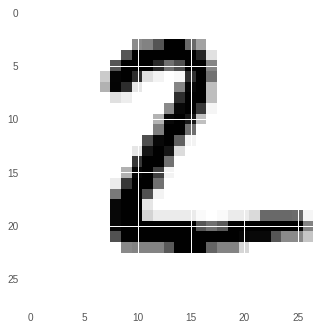

In [38]:
plt.imshow(x_test_modified[1,:,:,0],cmap='binary')

In [36]:
input_image=x_test_modified[1,:,:,:].reshape(1,28,28,1)
prediction=model.predict_classes(input_image)
print(prediction)

[2]


# Saving model

In [0]:
model.save('model_digits_CNN_file.h5')